## Problem Definition

###### Given a farely great amount of data about bulldozers (features and their sales price), is it possible to predict the sale - price of a bulldozer using a linear - regression machine learning model?

### Data
###### The data used in this project comes from [kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data).

###### The data was part of a [kaggle - competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview) which aim was to find a suitable model to predict the prices of bulldozers.

###### The data is split into three different sets:

###### Train.csv

* is the training set, which contains data through the end of 2011.
  Valid.csv

###### Valid.csv

* is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set.
  Test.csv

###### Test.csv

* is the test set. It contains data from May 1, 2012 - November 2012.
  Evaluation
  The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted         auction prices.

-> [source](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation)

Features
There are 52 different features in the data sets. Those are described in detail in the data-dictionary in this project. For more information about the features check: [Features](https://www.kaggle.com/c/bluebook-for-bulldozers/data)

###### Importing modules and model - classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn
import seaborn as sns
import scipy

In [2]:
from sklearn.linear_model import SGDClassifier, Lasso, Ridge
from sklearn.kernel_approximation import RBFSampler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Import data

In [6]:
#Import training and validation data to explore the data-set
df = pd.read_csv("../data/training_data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sort data after TimerSeries data

In [7]:
#Sort the DataFrame after the TimeSeries Data
df.sort_values(by=["saledate"], inplace=True) 

In [8]:
#check changes(should be chronologically)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


###### Another thing we might do is split the datetime column into year and month.

In [9]:
#Create Month and year column for the sales
df["Sale-Month"] = df["saledate"].dt.month
df["Sale-Year"] = df["saledate"].dt.year
df.drop("saledate", axis=1, inplace=True)

##### Let's now visualize the distribution of some important random variables.

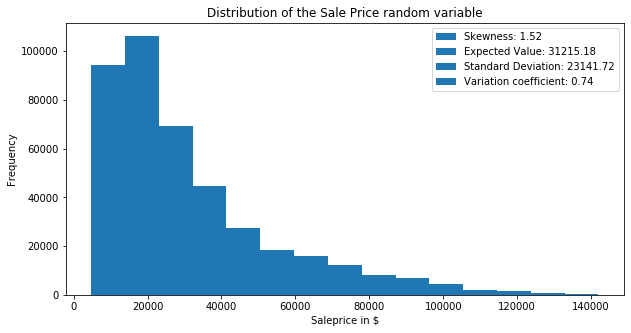

In [10]:
fig, ax = plt.subplots(figsize=(10,5),
                       nrows=1,
                       ncols=1)

#Patching some important information
skewness = round(scipy.stats.skew(df["SalePrice"]),2)
skewness_patch=mpatches.Patch(label="Skewness: "+str(skewness))

expected_value=round(np.mean(df["SalePrice"]),2)
expected_value_patch=mpatches.Patch(label="Expected Value: "+str(expected_value))

std_deviation=round(np.std(df["SalePrice"]),2)
std_deviation_patch=mpatches.Patch(label="Standard Deviation: "+str(std_deviation))

variation_coefficient=round(scipy.stats.variation(df["SalePrice"]),2)
variation_coefficient_patch=mpatches.Patch(label="Variation coefficient: "+str(variation_coefficient))

#Plotting the legend
plt.legend(handles=[skewness_patch, expected_value_patch, std_deviation_patch, variation_coefficient_patch])

#Plotting histogram
ax.hist(df["SalePrice"], bins=15)

#Set meta-information
ax.set(title="Distribution of the Sale Price random variable",
       xlabel="Saleprice in $",
       ylabel="Frequency");

plt.show()

As the skewness - value indicates, the Distribution of the SalePrice - random variable is very right skewed. 

The majority of the data is therefore in the left side of the distribution with the majority of the data within the range of ~[5000,40000]